# Python: pandas. Practice and exercises

**NOTES**

 - There are many ways to solve each problem, find yours.

 - Create the extra cells you need.

 - Remember that a cell can be a Code cell or a Markdown cell. Use the latter to write text and explanations if needed.

 - Try to create variables when solving the exercises.

 - You can rely on the Internet: all programmers do it every day.

<img width=500 src="https://upload.wikimedia.org/wikipedia/commons/3/31/TitanicBeken.jpg">

Import the csv of the titanic to a dataframe

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
df = pd.read_csv("../datasets/titanic.csv")

In [4]:
type(df)

pandas.core.frame.DataFrame

Take a look at the first rows of the dataframe

In [5]:
df.head(4)

,Name,Sex,Age,Pclass,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,"Karaic, Mr. Milan",male,30.0,3,0,0,349246,7.8958,NaN,S,0
1,"Dean, Mrs. Bertram",female,33.0,3,1,2,C.A. 2315,20.5750,NaN,S,1
2,"Rice, Mrs. William",female,39.0,3,0,5,382652,29.1250,NaN,Q,0
3,"Davidson, Mrs. Thornton",female,27.0,1,1,2,F.C. 12750,52.0000,B71,S,1


In [6]:
df.tail(3)

,Name,Sex,Age,Pclass,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
1306,"Gustafsson, Mr. Karl Gideon",male,19.0,3,0,0,347069,7.7750,NaN,S,0
1307,"Gustafsson, Mr. Anders Vilhelm",male,37.0,3,2,0,3101276,7.9250,NaN,S,0
1308,"McDermott, Miss. Brigdet Delia",female,NaN,3,0,0,330932,7.7875,NaN,Q,1


How many passengers are in this dataframe?

In [7]:
df.shape[0]

1309

What are the columns of the dataframe?

In [8]:
df.columns

Index(['Name', 'Sex', 'Age', 'Pclass', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Survived'],
      dtype='object')

Lists columns of numeric type

In [9]:
col_types = df.dtypes

In [10]:
col_types

Name         object
Sex          object
Age         float64
Pclass        int64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
Survived      int64
dtype: object

In [11]:
for col_name, col_type in col_types.items():
    if col_type in ["int64", "float64"]:
        print(col_name)

Age
Pclass
SibSp
Parch
Fare
Survived


What is the average age of the passengers? And the median? How do you interpret the result?

In [12]:
df.Age.mean()

29.881137667304014

In [13]:
df.Age.median()

28.0

Not very different -> not many different orders of magnitude, makes sense

mean > median: few quite big values

<AxesSubplot: xlabel='Age', ylabel='Count'>

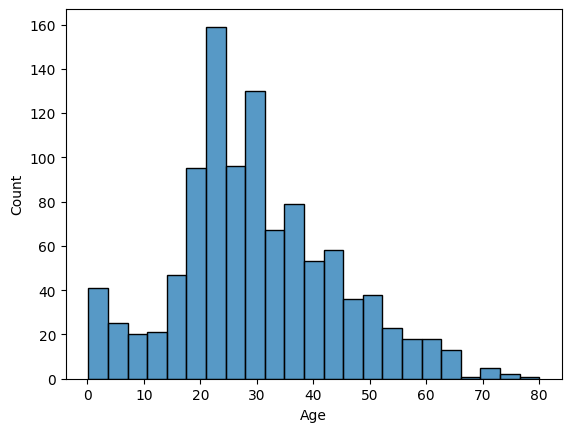

In [14]:
sns.histplot(x=df.Age)

<img width=400 src="https://miro.medium.com/v2/resize:fit:846/1*XU3Kdl521XnWHECHZ7XOaQ.jpeg">

How much did the most expensive ticket cost? Who paid for it?

In [15]:
df.head()

,Name,Sex,Age,Pclass,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,"Karaic, Mr. Milan",male,30.0,3,0,0,349246,7.8958,NaN,S,0
1,"Dean, Mrs. Bertram",female,33.0,3,1,2,C.A. 2315,20.5750,NaN,S,1
2,"Rice, Mrs. William",female,39.0,3,0,5,382652,29.1250,NaN,Q,0
3,"Davidson, Mrs. Thornton",female,27.0,1,1,2,F.C. 12750,52.0000,B71,S,1
4,"Ridsdale, Miss. Lucy",female,50.0,2,0,0,W./C. 14258,10.5000,NaN,S,1


In [16]:
df.Fare.max()

512.3292

In [17]:
df[df.Fare == df.Fare.max()]

,Name,Sex,Age,Pclass,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
255,"Cardeza, Mrs. James Warburton Martinez",female,58.0,1,0,1,PC 17755,512.3292,B51 B53 B55,C,1
272,"Lesurer, Mr. Gustave J",male,35.0,1,0,0,PC 17755,512.3292,B101,C,1
543,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,1,0,1,PC 17755,512.3292,B51 B53 B55,C,1
1152,"Ward, Miss. Anna",female,35.0,1,0,0,PC 17755,512.3292,NaN,C,1


How much did all the passengers pay?

It would be necessary to check if there is any missing data

In [18]:
df.Fare.isna().sum()

1

In [19]:
df.Fare.sum()

43550.4869

In [20]:
print(f"All passengers but {df.Fare.isna().sum()} have their ticket fare informed. Their fare sum is ~{df.Fare.sum().round(-2)}")

All passengers but 1 have their ticket fare informed. Their fare sum is ~43600.0


Who was the youngest passenger and how old was he/she?

In [21]:
df.Age.min()

0.17

In [22]:
df[df.Age == df.Age.min()]

,Name,Sex,Age,Pclass,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
151,"Dean, Miss. Elizabeth Gladys Millvina",female,0.17,3,1,2,C.A. 2315,20.575,NaN,S,1


In [23]:
df[df.Age < 1]

,Name,Sex,Age,Pclass,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
104,"Hamalainen, Master. Viljo",male,0.67,2,1,1,250649,14.5000,NaN,S,1
151,"Dean, Miss. Elizabeth Gladys Millvina",female,0.17,3,1,2,C.A. 2315,20.5750,NaN,S,1
211,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.33,3,0,2,347080,14.4000,NaN,S,0
580,"Peacock, Master. Alfred Edward",male,0.75,3,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,0
650,"Caldwell, Master. Alden Gates",male,0.83,2,0,2,248738,29.0000,NaN,S,1
675,"Thomas, Master. Assad Alexander",male,0.42,3,0,1,2625,8.5167,NaN,C,1
807,"Baclini, Miss. Helene Barbara",female,0.75,3,2,1,2666,19.2583,NaN,C,1
855,"West, Miss. Barbara J",female,0.92,2,1,2,C.A. 34651,27.7500,NaN,S,1
1015,"Allison, Master. Hudson Trevor",male,0.92,1,1,2,113781,151.5500,C22 C26,S,1
1133,"Baclini, Miss. Eugenie",female,0.75,3,2,1,2666,19.2583,NaN,C,1


Would it be possible to determine the ratio female to male on the titanic?

In [24]:
df.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [25]:
(df.Sex.value_counts()["male"] / df.Sex.value_counts()["female"]).round(2)

1.81

How many passengers were under 20? What percentage?

In [26]:
df[df.Age < 20].shape[0]

225

In [27]:
(df.Age < 20).sum()

225

In [28]:
(df.Age < 20).sum() / df.shape[0] * 100

17.188693659281896

What is age decile 9?

decile 9 = percentile 90

In [29]:
df.Age.quantile(0.9)

50.0

How many people survived? How many died?

In [30]:
df.Survived.value_counts()

0    809
1    500
Name: Survived, dtype: int64

How many people were traveling in each class?

In [31]:
df.Pclass.value_counts().sort_index()

1    323
2    277
3    709
Name: Pclass, dtype: int64

Was it more likely to survive being first class?

In [32]:
pd.crosstab(df.Pclass, df.Survived, normalize="index").round(2)

Survived,0,1
Pclass,,
1,0.38,0.62
2,0.57,0.43
3,0.74,0.26


or

In [33]:
df.groupby('Pclass')['Survived'].mean().round(2)

Pclass
1    0.62
2    0.43
3    0.26
Name: Survived, dtype: float64

How many family members did people travel with (reported in the SibSp column)?

In [34]:
df.SibSp.value_counts().sort_index()

0    891
1    319
2     42
3     20
4     22
5      6
8      9
Name: SibSp, dtype: int64

How many boarding gates were there?

In [35]:
df.Embarked.nunique()

3

In [36]:
df.Embarked.unique()

array(['S', 'Q', 'C', nan], dtype=object)

In [37]:
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

Create a dataframe with the people who traveled in first class

In [38]:
df_first_class = df[df.Pclass == 1]

In [39]:
df_first_class.shape

(323, 11)

In [40]:
df_first_class.Sex.value_counts()

male      179
female    144
Name: Sex, dtype: int64

Creates a dataframe containing women and children

In [41]:
df_boats = df[(df.Sex == "female") | (df.Age < 18)]

In [42]:
df_boats.Survived.value_counts()

1    370
0    178
Name: Survived, dtype: int64

Create a dataframe with the people who will not travel on the `S`.

In [44]:
df_not_S = df[~(df.Embarked == "S")]

In [45]:
df_not_S.shape

(395, 11)

Create a dataframe with all the "Miss" passengers

In [46]:
df.head()

,Name,Sex,Age,Pclass,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,"Karaic, Mr. Milan",male,30.0,3,0,0,349246,7.8958,NaN,S,0
1,"Dean, Mrs. Bertram",female,33.0,3,1,2,C.A. 2315,20.5750,NaN,S,1
2,"Rice, Mrs. William",female,39.0,3,0,5,382652,29.1250,NaN,Q,0
3,"Davidson, Mrs. Thornton",female,27.0,1,1,2,F.C. 12750,52.0000,B71,S,1
4,"Ridsdale, Miss. Lucy",female,50.0,2,0,0,W./C. 14258,10.5000,NaN,S,1


In [47]:
sentence = "my name is Manuel"

In [49]:
sentence.split("a")

['my n', 'me is M', 'nuel']

In [61]:
df["title"] = df.Name.str.split(", ").str[1].str.split(".").str[0]

In [63]:
df.title.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Ms                2
Mlle              2
Major             2
Capt              1
Dona              1
Jonkheer          1
Lady              1
Mme               1
Don               1
Sir               1
the Countess      1
Name: title, dtype: int64

Create a Boolean column that stores whether the passenger is over 21 or not

In [65]:
df["is_big"] = df.Age >= 21

In [66]:
df

,Name,Sex,Age,Pclass,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,title,is_big
0,"Karaic, Mr. Milan",male,30.0,3,0,0,349246,7.8958,NaN,S,0,Mr,True
1,"Dean, Mrs. Bertram",female,33.0,3,1,2,C.A. 2315,20.5750,NaN,S,1,Mrs,True
2,"Rice, Mrs. William",female,39.0,3,0,5,382652,29.1250,NaN,Q,0,Mrs,True
3,"Davidson, Mrs. Thornton",female,27.0,1,1,2,F.C. 12750,52.0000,B71,S,1,Mrs,True
4,"Ridsdale, Miss. Lucy",female,50.0,2,0,0,W./C. 14258,10.5000,NaN,S,1,Miss,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,"Strilic, Mr. Ivan",male,27.0,3,0,0,315083,8.6625,NaN,S,0,Mr,True
1305,"Bengtsson, Mr. John Viktor",male,26.0,3,0,0,347068,7.7750,NaN,S,0,Mr,True
1306,"Gustafsson, Mr. Karl Gideon",male,19.0,3,0,0,347069,7.7750,NaN,S,0,Mr,False
1307,"Gustafsson, Mr. Anders Vilhelm",male,37.0,3,2,0,3101276,7.9250,NaN,S,0,Mr,True


Create a column with the passenger's birth year

Were first class tickets more expensive?

Were the men younger than the women on the Titanic?

Did the number of relatives affect the probability of survival?

Create a column that stores whether the passenger's ticket number contains any letters. Define a function for this and use `apply`.

Export the data to a csv named `titanic_enriched.csv`.